<a href="https://colab.research.google.com/github/GustavoLSantos/AlloyCare/blob/main/AlloyCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#In this project, I'm going to develop the Alloy Care, a fictitious startup that has the goal of reducing the number of exams needed for the diagnose of breast cancer
#Here we used a fake dataset based on the Breast Cancer Wisconsin (Diagnostic) Data Set

import pandas as pd

exams_results = pd.read_csv("/content/exames.csv")
exams_results.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

exams_values = exams_results.drop(columns=['id', 'diagnostico', 'exame_33'])
diagnosis = exams_results.diagnostico

#exams_values_v1 = exams_values.drop(columns="exame_33")

def classifyForest(values):
  SEED=1234
  random.seed(SEED)
  train_x, test_x, train_y, test_y = train_test_split(values, diagnosis, test_size=0.3)
  classifier = RandomForestClassifier(n_estimators=100)
  classifier.fit(train_x, train_y)
  print("Classification result %.2f%%" % (classifier.score(test_x,test_y)*100))

classifyForest(exams_values)

Classification result 92.40%


In [3]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

def classifyDummy(values):
  dummy_classifier = DummyClassifier(strategy="most_frequent")
  train_x, test_x, train_y, test_y = train_test_split(values, diagnosis, test_size=0.3)
  dummy_classifier.fit(train_x, train_y)
  print("Dummy Classification result %.2f%%" % (dummy_classifier.score(test_x,test_y)*100))

classifyDummy(exams_values)

Dummy Classification result 66.67%


In [4]:
#import seaborn as sns
#import matplotlib.pyplot as plt

#plot_data = pd.concat([diagnosis,exams_values.iloc[:,0:10]], axis=1)
#plot_data = pd.melt(plot_data, id_vars="diagnostico", var_name="exames", value_name="valores")
#plt.figure(figsize=(10,10))
#sns.violinplot(x="exames",y="valores", hue="diagnostico",data = plot_data)
#plt.xticks(rotation=90)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

patternizer = StandardScaler()
patternizer.fit(exams_values)
exams_values_v2 = patternizer.transform(exams_values)
exams_values_v2 = pd.DataFrame(data=exams_values_v2,columns=exams_values.keys())

def violin_chart(values, start, end):
  plot_data = pd.concat([diagnosis,values.iloc[:,start:end]], axis=1)
  plot_data = pd.melt(plot_data, id_vars="diagnostico", var_name="exames", value_name="valores")
  plt.figure(figsize=(10,10))
  sns.violinplot(x="exames",y="valores", hue="diagnostico",data = plot_data, split=True)
  plt.xticks(rotation=90)


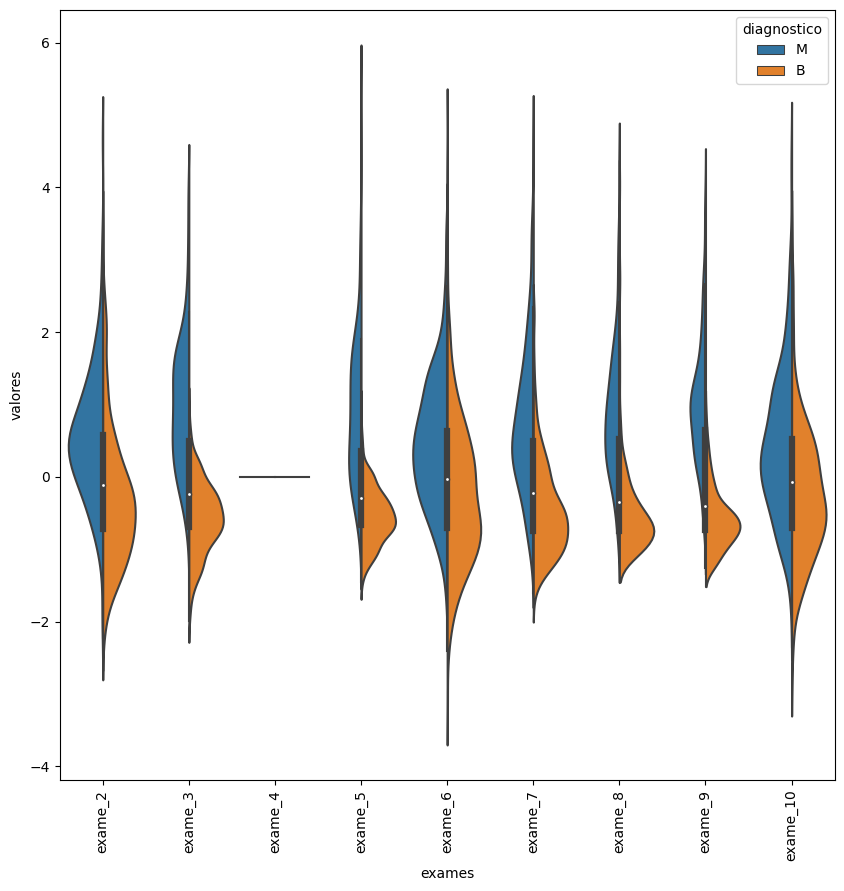

In [6]:
violin_chart(exams_values_v2, 1, 10)

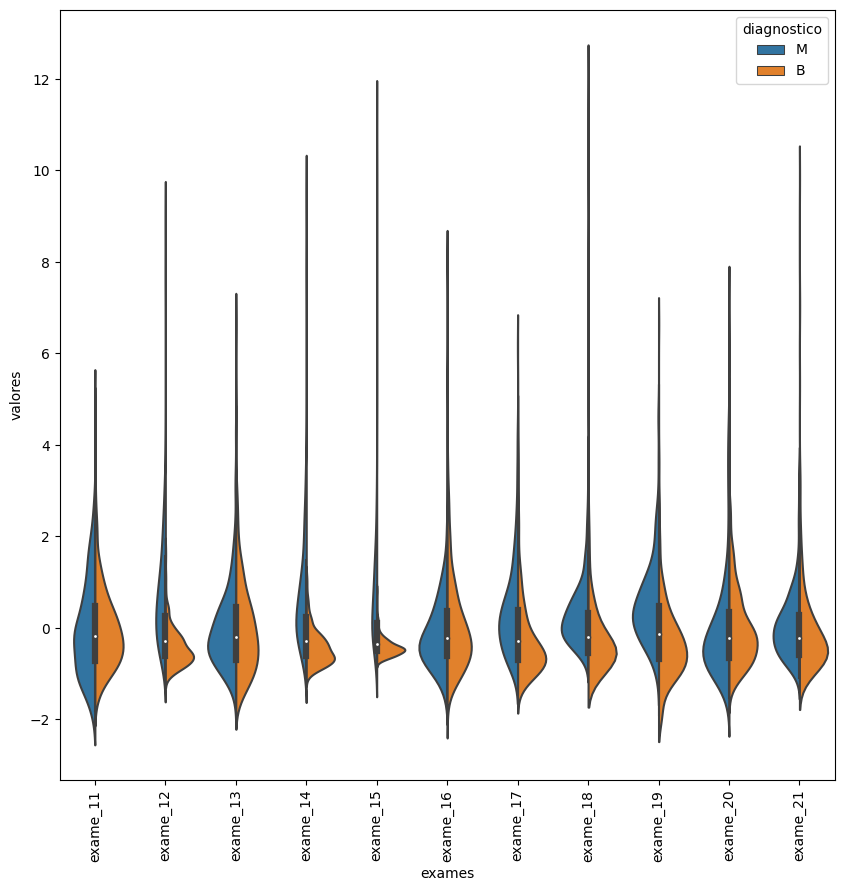

In [7]:
violin_chart(exams_values_v2, 10, 21)

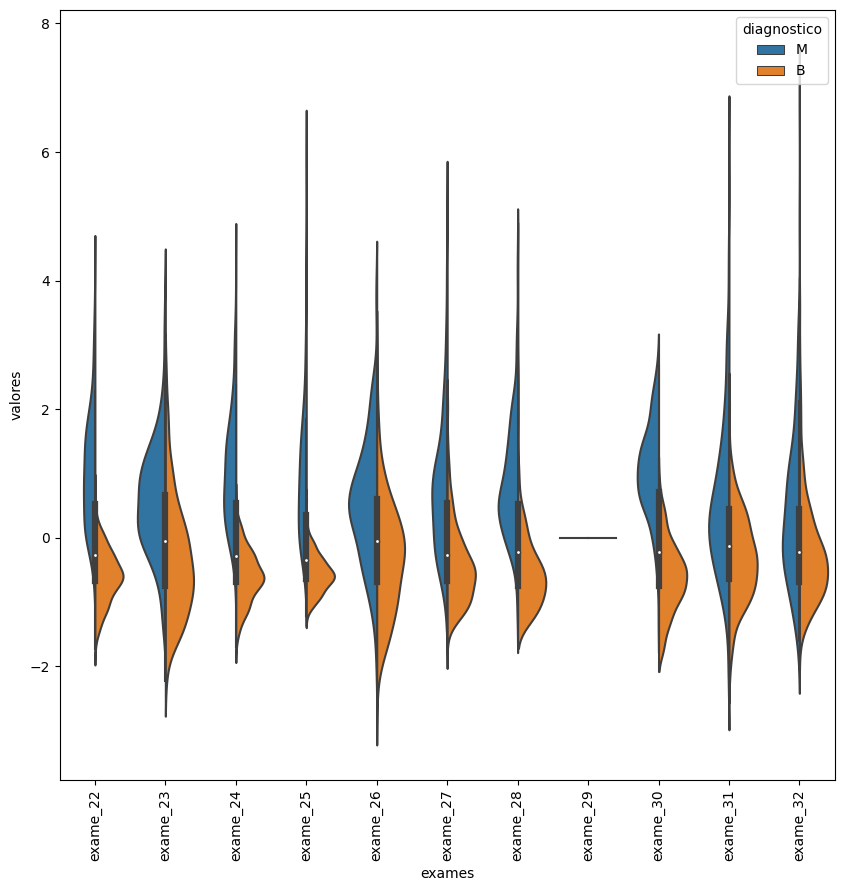

In [8]:
violin_chart(exams_values_v2, 21, 32)

In [9]:
unconstant_exams = exams_values_v2.drop(columns=['exame_29','exame_4'])

classifyForest(unconstant_exams)

Classification result 92.98%


<Axes: >

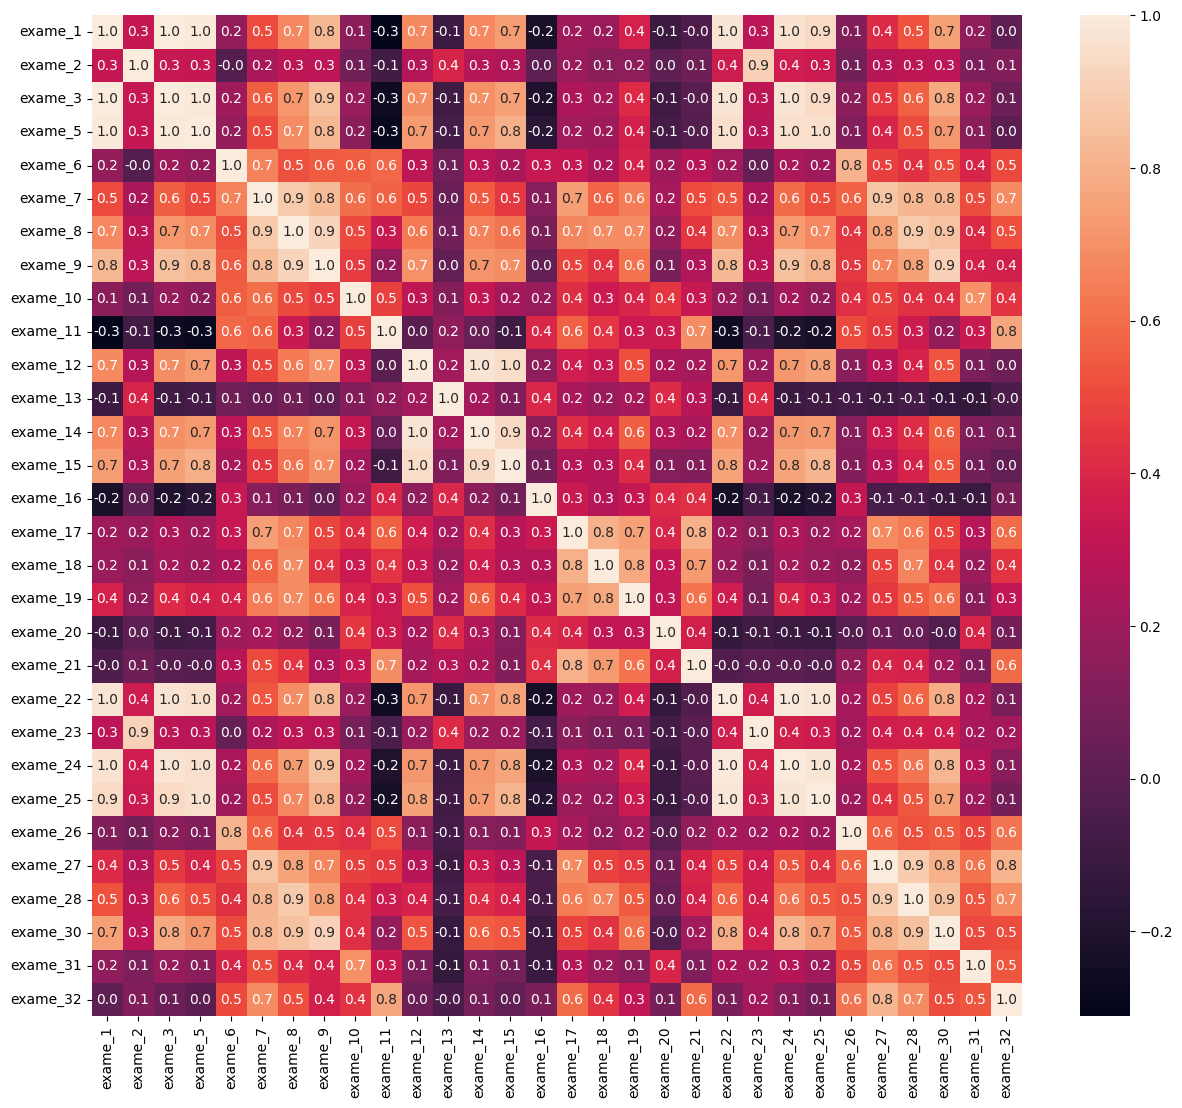

In [10]:
#Correlation Matrix

correlation_matrix = unconstant_exams.corr()
plt.figure(figsize = (15,13))
sns.heatmap(correlation_matrix, annot = True, fmt = ".1f")

In [11]:
#Correlation Matrix above 0,99

correlation_matrix_v1 = correlation_matrix[correlation_matrix>0.99]
correlation_matrix_v1 = correlation_matrix_v1.sum()
correlation_matrix_v1

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [12]:
#Correlation Variables above 1

correlation_variables = correlation_matrix_v1[correlation_matrix_v1>1]
correlation_variables

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [13]:
#Exams values without some of the correlation variables column's above 1

exams_values_v3 = unconstant_exams.drop(columns=["exame_3","exame_24"])
exams_values_v3.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [14]:
#Here we can see that we dropped 2 features without damaging our result

classifyForest(exams_values_v3)

Classification result 92.98%


In [15]:
#Now let's select the k best features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SEED = 1234
random.seed(SEED)
#Here we will repeat the process of droping the columns we already understood are not needed on the firt DataFrame, since it's the one without any negative values, right before normalization.
exams_values_v4 = exams_values.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

select_kbest = SelectKBest(chi2, k = 5)
train_x, test_x, train_y, test_y = train_test_split(exams_values_v4, diagnosis, test_size=0.3)

select_kbest.fit(train_x, train_y)
train_kbest = select_kbest.transform(train_x)
test_kbest = select_kbest.transform(test_x)
kbest_classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
kbest_classifier.fit(train_kbest, train_y)
print("Classification result %.2f%%" % (kbest_classifier.score(test_kbest,test_y)*100))

#What we did here was reduce the amount of features from 33 to 5 with the select kbest, maintaining almost the same classifier score.
#That means that if the exams all cost the same, we reduced the total cost in 85%, since the patient will only have to do 5 exams instead of 33.

Classification result 92.40%


[Text(0.5, 18.249999999999986, 'Prediction'), Text(52.25, 0.5, 'Real')]

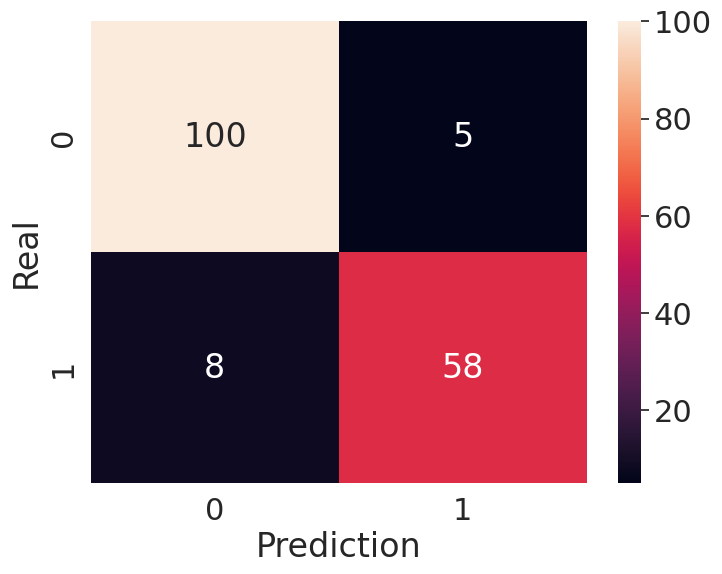

In [16]:
#Now we'll analyze the impact we've had after this reduction of features with a confusion matrix.

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(test_y, kbest_classifier.predict(test_kbest))
plt.figure(figsize= (8,6))
sns.set(font_scale=2)
sns.heatmap(confusion_matrix, annot = True, fmt = "d").set(xlabel="Prediction", ylabel="Real")

Classification result 93.57%


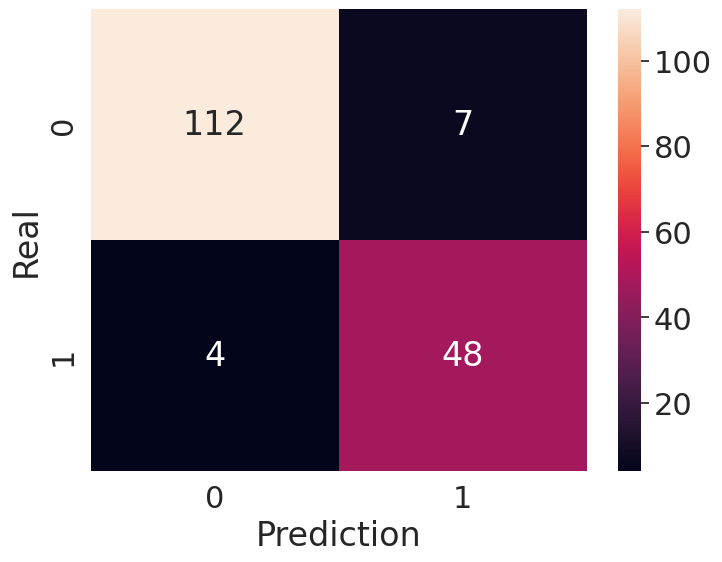

In [38]:
#Now we'll use a very similar model to the selectkbest, which is the RFE, and compare our results

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(exams_values_v4, diagnosis, test_size=0.3)

rfe_classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
rfe_classifier.fit(train_x, train_y)
rfe_selector = RFE(estimator = rfe_classifier, n_features_to_select= 2, step=1)
rfe_selector.fit(train_x,train_y)
train_rfe = rfe_selector.transform(train_x)
test_rfe = rfe_selector.transform(test_x)
rfe_classifier.fit(train_rfe, train_y)

confusion_matrix_rfe = confusion_matrix(test_y, rfe_classifier.predict(test_rfe))
plt.figure(figsize= (8,6))
sns.set(font_scale=2)
sns.heatmap(confusion_matrix_rfe, annot = True, fmt = "d").set(xlabel="Prediction", ylabel="Real")

print("Classification result %.2f%%" % (rfe_classifier.score(test_rfe,test_y)*100))

#Here we can see the results of this method are worse, therefore, let's not consider it worthy
#We can also see that it gets more benign cancer rights and less malign cancer rights

Classification result 95.32%


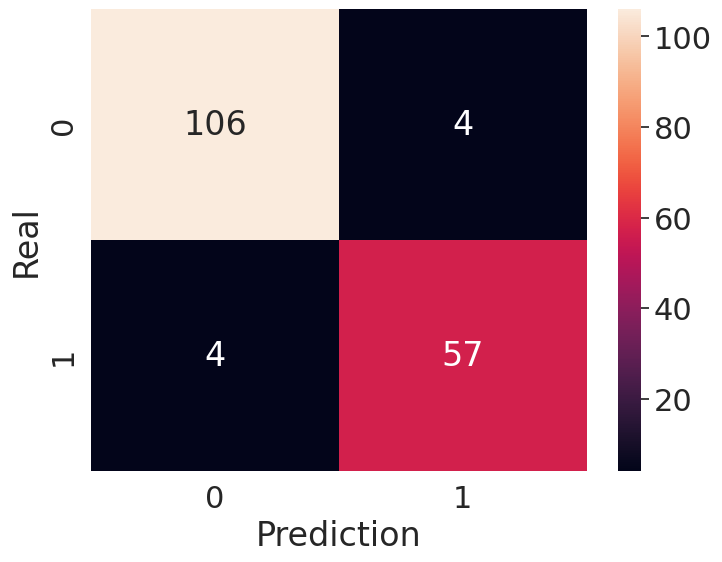

In [39]:
#Here we'll use RFE Cross Validation to see the best possible result and the features we need to use

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix

SEED = 1234
random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(exams_values_v4, diagnosis, test_size=0.3)

rfecv_classifier = RandomForestClassifier(n_estimators=100, random_state=1234)
rfecv_classifier.fit(train_x, train_y)
rfecv_selector = RFECV(estimator = rfecv_classifier, cv = 5, step=1, scoring="accuracy")
rfecv_selector.fit(train_x,train_y)
train_rfecv = rfecv_selector.transform(train_x)
test_rfecv = rfecv_selector.transform(test_x)
rfecv_classifier.fit(train_rfecv, train_y)

confusion_matrix_rfecv = confusion_matrix(test_y, rfecv_classifier.predict(test_rfecv))
plt.figure(figsize= (8,6))
sns.set(font_scale=2)
sns.heatmap(confusion_matrix_rfecv, annot = True, fmt = "d").set(xlabel="Prediction", ylabel="Real")

print("Classification result %.2f%%" % (rfecv_classifier.score(test_rfecv,test_y)*100))

#So far this one has the best result

In [40]:
#Let's check the amount of features the RFECV selected and which are them

print("The amount of features used for the best possible result in this seed were: ",rfecv_selector.n_features_)
print("The features used were: ",train_x.columns[rfecv_selector.support_])


The amount of features used for the best possible result in this seed were:  13
The features used were:  Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_15',
       'exame_22', 'exame_23', 'exame_25', 'exame_27', 'exame_28', 'exame_30',
       'exame_31'],
      dtype='object')


<Axes: >

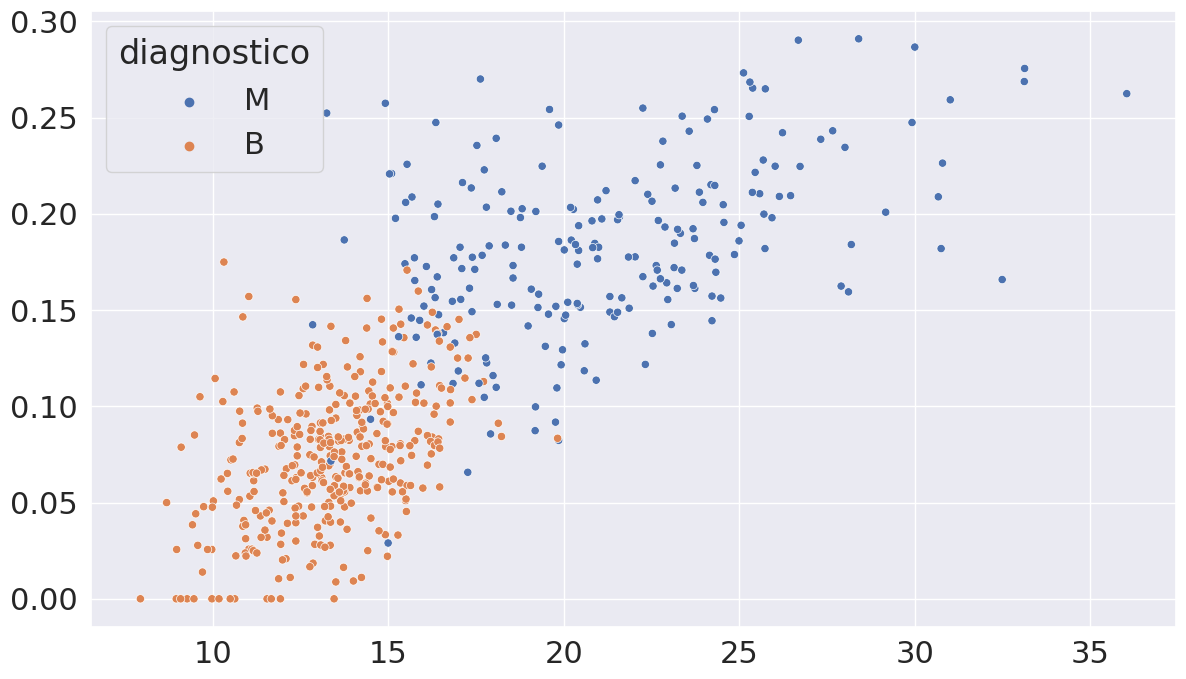

In [41]:
import seaborn as sns

exams_values_v5 = rfe_selector.transform(exams_values_v4)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exams_values_v5[:,0] , y = exams_values_v5[:,1], hue = diagnosis)

#In this case we're showing the results based on only 2 features, therefore is not the most precise result

<Axes: >

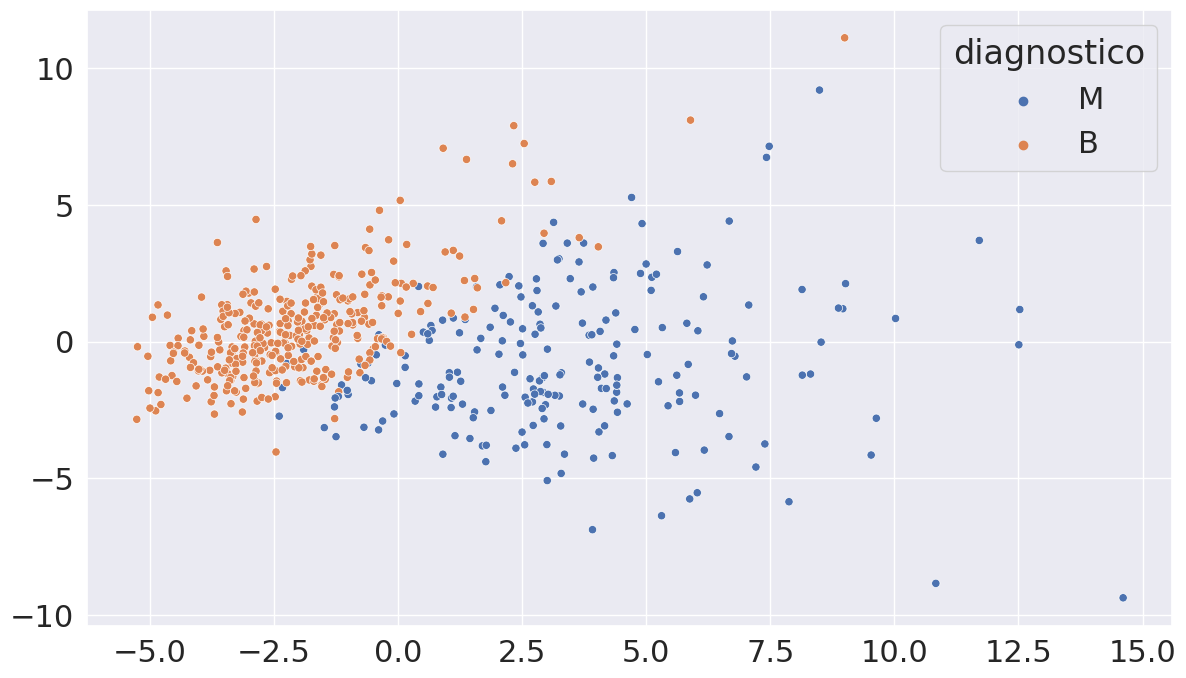

In [42]:
#To maintain the maximum of information possible in a low dimensionality, we can use PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
exams_values_v6 = pca.fit_transform(exams_values_v3)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exams_values_v6[:,0] , y = exams_values_v6[:,1], hue = diagnosis)

<Axes: >

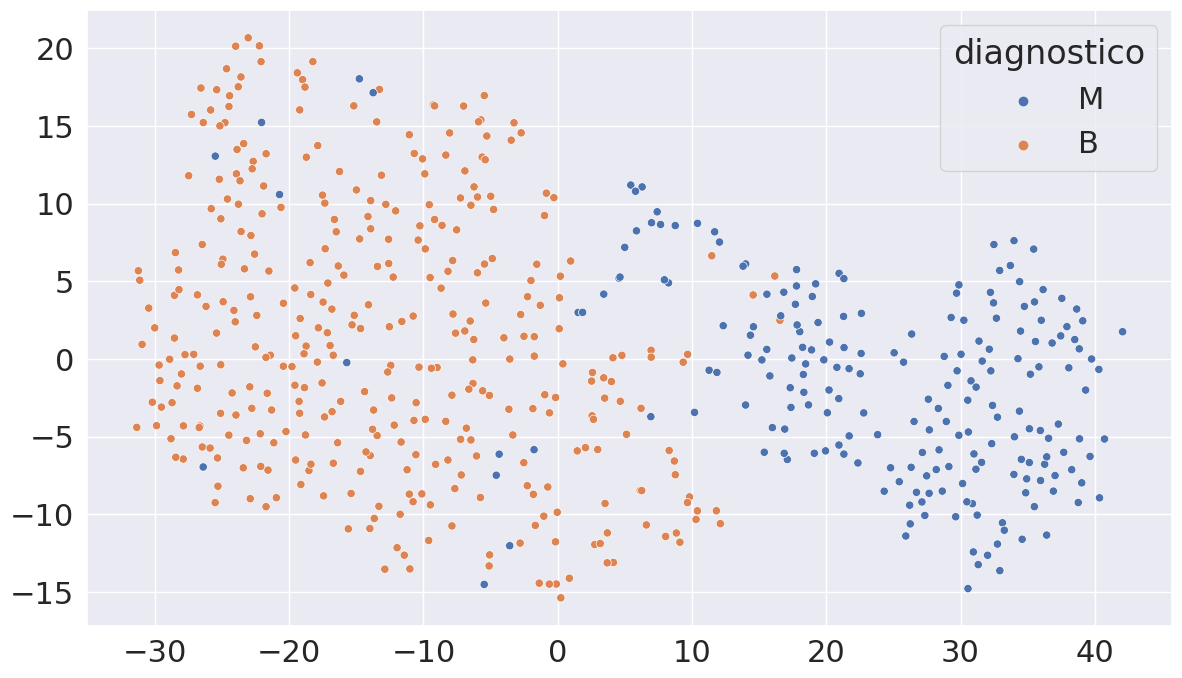

In [43]:
#With TSNE we can have a glimpse of how far a dot will be from the other (Dimensionality Reduction)
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
exams_values_v7 = tsne.fit_transform(exams_values_v3)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exams_values_v7[:,0] , y = exams_values_v7[:,1], hue = diagnosis)